# U.S. Medical Insurance Costs

In this project, a **CSV** file with medical insurance costs will be investigated using Python fundamentals. The goal with this project will be to analyze various attributes within **insurance.csv** to learn more about the patient information in the file and gain insight into potential use cases for the dataset.

In [895]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import statistics 
import csv
file = 'insurance.csv'

Below I have built a function that reads the CSV file and stores it as a variable, allowing it to be referenced later by functions during my analysis. 

**insurance.csv** contains the following columns:
* Patient Age
* Patient Sex 
* Patient BMI
* Patient Number of Children
* Patient Smoking Status
* Patient U.S Geopraphical Region
* Patient Yearly Medical Insurance Cost

Using the descibe function, we can see each column has 1338 values, highlighting there are no signs of missing data. To store this information, seven empty lists will be created hold each individual column of data from **insurance.csv**. This will allow the data to be stored as a dictionary, though the majority of our analysis will be via pandas.

In [896]:
#Create empty lists for the various attributes in insurance.csv

ages = []
sexes = []
bmis = []
num_children = []
smoker_statuses = []
regions = []
insurance_charges = []


In [897]:
# function to load CSV file and push values into lists

def load_list_data(lst, csv_file, column_name):
    
    with open(csv_file) as csv_data:
        csv_dict = csv.DictReader(csv_data)
        for row in csv_dict:
            lst.append(row[column_name])
        return lst

load_list_data(ages, 'insurance.csv', 'age')
load_list_data(sexes, 'insurance.csv', 'sex')
load_list_data(bmis, 'insurance.csv', 'bmi')
load_list_data(num_children, 'insurance.csv', 'children')
load_list_data(smoker_statuses, 'insurance.csv', 'smoker')
load_list_data(regions, 'insurance.csv', 'region')
load_list_data(insurance_charges, 'insurance.csv', 'charges')

['16884.924',
 '1725.5523',
 '4449.462',
 '21984.47061',
 '3866.8552',
 '3756.6216',
 '8240.5896',
 '7281.5056',
 '6406.4107',
 '28923.13692',
 '2721.3208',
 '27808.7251',
 '1826.843',
 '11090.7178',
 '39611.7577',
 '1837.237',
 '10797.3362',
 '2395.17155',
 '10602.385',
 '36837.467',
 '13228.84695',
 '4149.736',
 '1137.011',
 '37701.8768',
 '6203.90175',
 '14001.1338',
 '14451.83515',
 '12268.63225',
 '2775.19215',
 '38711',
 '35585.576',
 '2198.18985',
 '4687.797',
 '13770.0979',
 '51194.55914',
 '1625.43375',
 '15612.19335',
 '2302.3',
 '39774.2763',
 '48173.361',
 '3046.062',
 '4949.7587',
 '6272.4772',
 '6313.759',
 '6079.6715',
 '20630.28351',
 '3393.35635',
 '3556.9223',
 '12629.8967',
 '38709.176',
 '2211.13075',
 '3579.8287',
 '23568.272',
 '37742.5757',
 '8059.6791',
 '47496.49445',
 '13607.36875',
 '34303.1672',
 '23244.7902',
 '5989.52365',
 '8606.2174',
 '4504.6624',
 '30166.61817',
 '4133.64165',
 '14711.7438',
 '1743.214',
 '14235.072',
 '6389.37785',
 '5920.1041',
 '176

In [917]:
# function to load CSV file

def open_csv_file(csv_file):
    df = pd.read_csv(csv_file)
    return df

orig_df = open_csv_file(file)
df = open_csv_file(file)
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [899]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Now we need to confirm whether the data is strong sample and representiave of a general population. If it is decided to use the dataset to make inferences about other populations, the data must abundant and broad enough for such use case.

# Analysing age

There are 1338 people within the dataframe. The average age of everyone is 39, the range is 46, and the standard deviation is 14.
The average age of men is 38.
The average age of females is 39.


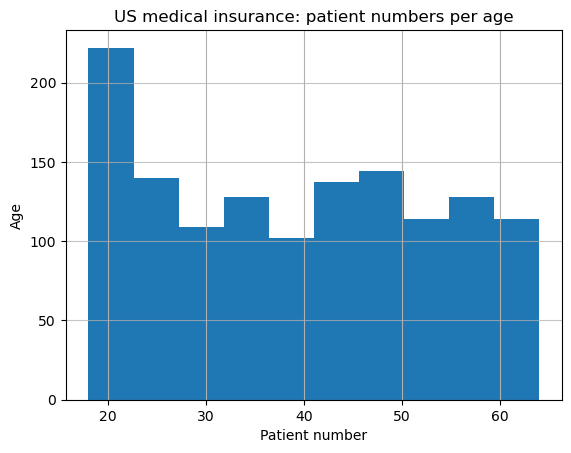

In [930]:
def average_ages(df):
    
    #numbr of people in the df
    people = len(df.index)
    
    # the average age of everyone
    avg_age_all = int(df["age"].mean())
    
    # the standard deviation of the age of everyone 
    sd_age_all = int(statistics.stdev(df['age']))
    
    #the ranger of ages
    range_age_all = max(df['age']) - min(df['age'])
   
    # the average each of each gender
    avg_age_men = int(df.loc[df['sex'] == 'male', 'age'].mean())
    avg_age_fem = int(df.loc[df['sex'] == 'female', 'age'].mean())
    
    print("There are {} people within the dataframe. The average age of everyone is {}, the range is {}, and the standard deviation is {}.".format(people, avg_age_all, range_age_all, sd_age_all))  
    
    print("The average age of men is {}.".format(avg_age_men))
    print("The average age of females is {}.".format(avg_age_fem))

def ages_histogram(df):
    
    ages = df['age'].hist()
    
    ages.plot(grid=True, bins=20, rwidth=0.9, color='#607c8e')
    plt.title('US medical insurance: patient numbers per age')
    plt.xlabel('Patient number')
    plt.ylabel('Age')
    plt.grid(axis='y', alpha=0.75)

average_ages(df)
df['age'].value_counts()

ages_histogram(df)

There appears to be a small skew towards younger ages, which could affect data analysis.

# Analysing gender

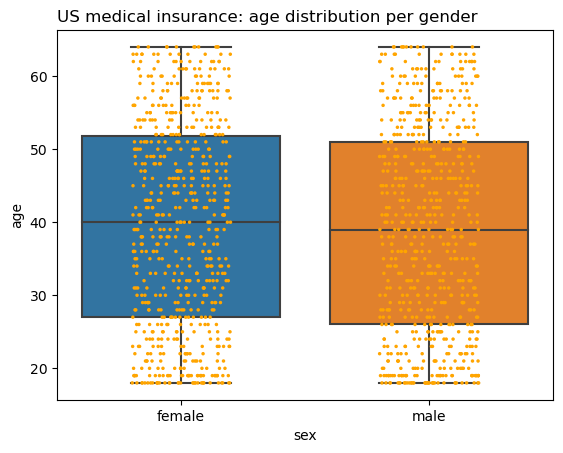

In [901]:
def ages_gender_boxplot(df):
    
    #boxplot showing the distribution of each gender via their age
    
    ax = sns.boxplot(x='sex', y='age', data=df)
    ax = sns.stripplot(x='sex', y='age', data=df, color="orange", jitter=0.2, size=2.5)
    plt.title("US medical insurance: age distribution per gender", loc="left")
    plt.show()

ages_gender_boxplot(df)

# Do demograpic variables affect insurance costs?

In [902]:
def charges(df):
    
    #the average charge of everyone 
    avg_charge_all = int(df["charges"].mean())
    
    avg_charge_men = int(df.loc[df['sex'] == 'male', 'charges'].mean())
    avg_charge_fem = int(df.loc[df['sex'] == 'female', 'charges'].mean())

    print("The average insurance charge, across EVERYONE, was ${}.".format(avg_charge_all))
    print("The average insurance charge, across men, was ${}.".format(avg_charge_men))
    print("The average insurance charge, across females, was ${}.".format(avg_charge_fem))
    
    if avg_charge_men > avg_charge_fem:
        men_h = int(((avg_charge_men / avg_charge_fem) - 1) *100)
        print("The average charges for men were {}% higher than women.".format(men_h))

charges(df)

The average insurance charge, across EVERYONE, was $13270.
The average insurance charge, across men, was $13956.
The average insurance charge, across females, was $12569.
The average charges for men were 11% higher than women.


Let's explore why males may be 11% more expensive than females. Is this to do with age? Smoking? A heatmap should give some insight.

The dataframe contains categorical AND numerical data, so the **dython** module will be imported to accomodate this.

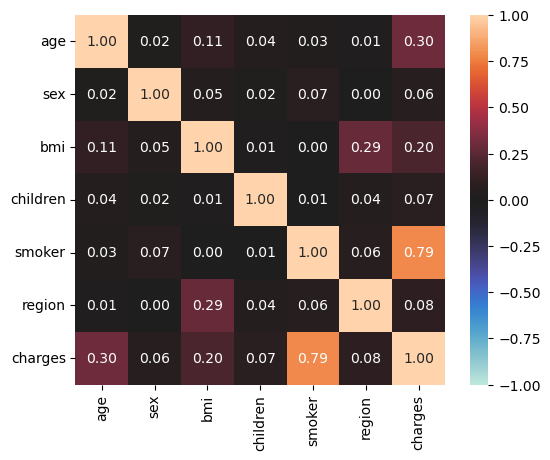

In [903]:
# do any variables show a correlation with cost?

def charges_heatmap(df):
    
    #https://blog.knoldus.com/how-to-find-correlation-value-of-categorical-variables/
    
    from dython.nominal import identify_nominal_columns
    categorical_features=identify_nominal_columns(df)
    categorical_features
    

    associations(df, nominal_columns='auto', numerical_columns=None, mark_columns=False, 
             nom_nom_assoc='cramer', num_num_assoc='pearson', 
             ax=None, figsize=None, annot=True, fmt='.2f', 
             cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, compute_only=False, 
             clustering=False, title=None, filename=None)
                                                                                                                                            
charges_heatmap(df)                                                                                                                                          

The heatmap has some potential insights. It would appear that smoker shows a large correlation with smoking, with age and bmi and also needing to be explored. Sex, children and region have little impact it seems. 

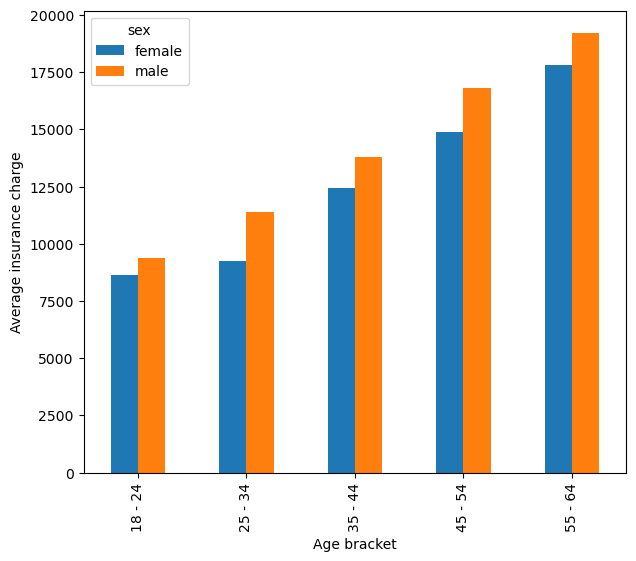

In [904]:
def gender_age_brackets(df):
    
    #create age brackets column
    
    age_bracket = []
    
    for row in df['age']:
        if (row > 17) and (row < 25): age_bracket.append('18 - 24')
        elif (row > 24) and (row < 35): age_bracket.append('25 - 34')
        elif (row > 34) and (row < 45): age_bracket.append('35 - 44')
        elif (row > 44) and (row < 55): age_bracket.append('45 - 54')
        elif (row > 54) and (row < 65): age_bracket.append('55 - 64')
        elif (row > 64) and (row < 75): age_bracket.append('65 - 74')
        elif row > 74: age_brackets.append('75+')
    
    ab = df['age brackets'] = age_bracket
    ab = df.drop(["age", "children",], axis = 1, inplace=True)
    ab = df.groupby(['age brackets', 'sex']).mean('charges')
    
    return ab 

ab = gender_age_brackets(df)

def age_bracket_gender_charges(ab):
    df_pivot = pd.pivot_table(ab, values="charges", index="age brackets", columns="sex", aggfunc=np.mean)
    ax = df_pivot.plot(kind="bar")
    # Get a Matplotlib figure from the axes object for formatting purposes
    fig = ax.get_figure()
    fig.set_size_inches(7, 6)
    ax.set_xlabel("Age bracket")
    ax.set_ylabel("Average insurance charge")

age_bracket_gender_charges(ab) 

As expected, age does contribute towards increased costs. 

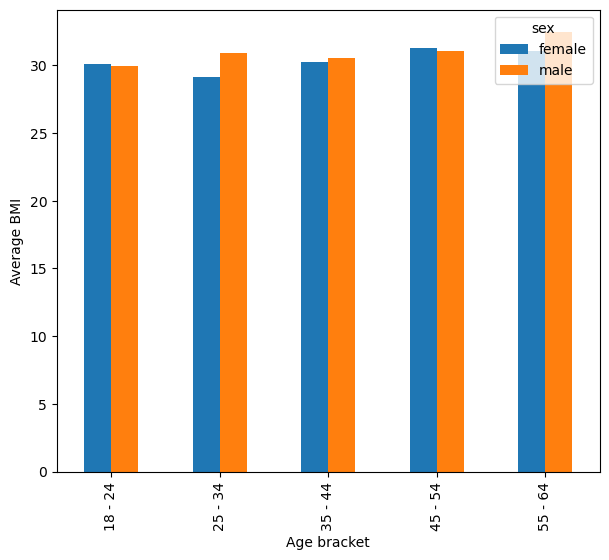

In [905]:
def age_bracket_gender_bmi(ab):
    df_pivot = pd.pivot_table(ab, values="bmi", index="age brackets", columns="sex", aggfunc=np.mean)
    ax = df_pivot.plot(kind="bar")
    # Get a Matplotlib figure from the axes object for formatting purposes
    fig = ax.get_figure()
    fig.set_size_inches(7, 6)
    ax.set_xlabel("Age bracket")
    ax.set_ylabel("Average BMI")

age_bracket_gender_bmi(ab)

The average BMI, across age brackets, is VERY similar between genders, likely insinuating that the 11% higher charge cost for men is unrelated. Could this instead be due to region then?

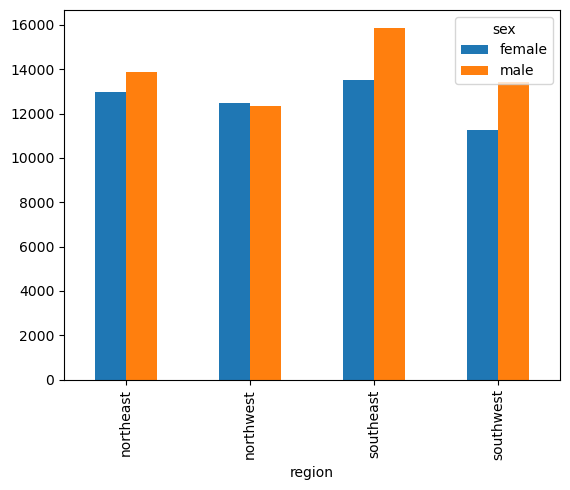

In [906]:
def region_charges(df):
    df_pivot = pd.pivot_table(df, values="charges", index="region", columns="sex", aggfunc=np.mean)
    ax = df_pivot.plot(kind="bar")
    #regions = df.groupby(['region', 'sex']).mean('charges')

region_charges(df)

The southeast and southwest are increasing average costs for men. Could this be due to a higher % of smokers in these regions?

In [907]:
def smokers_all(df):
    smokers = df.groupby(["region", "sex"])["smoker"].value_counts().unstack(fill_value=0)
    return smokers

smokers_all(df)    

smoker             no  yes
region    sex             
northeast female  132   29
          male    125   38
northwest female  135   29
          male    132   29
southeast female  139   36
          male    134   55
southwest female  141   21
          male    126   37

The average insurance charge for a smoker is $32050, 200% higher than a non smoker.


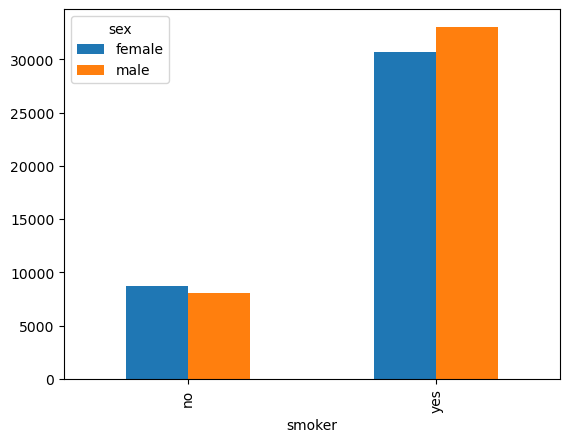

In [908]:
def smokers_charges(df):
    
    avg_smoker_charge = int(df.loc[df['smoker'] == 'yes', 'charges'].mean())
    avg_non_sm_charge = int(df.loc[df['smoker'] == 'no', 'charges'].mean())
    smoking_cost = int((avg_smoker_charge / avg_non_sm_charge) -1) * 100
    print("The average insurance charge for a smoker is ${}, {}% higher than a non smoker.".format(avg_smoker_charge, smoking_cost))
    
    #smokers = df.groupby(["smoker", "sex"])["charges"].mean().unstack(fill_value=0)
    smokers = pd.pivot_table(df, values="charges", index="smoker", columns="sex", aggfunc=np.mean)
    smokers.plot(kind="bar")
 
smokers_charges(df)

Indeed, smoking appears to correlate with an overall increase in insurance costs. 
In the northwest, the only region where males pay largely the same as women, smokers are the same.
In the other regions male smokers outnumber females and they pay more on average. 

In [909]:
#if you do not smoke, does region affect insurance costs? 

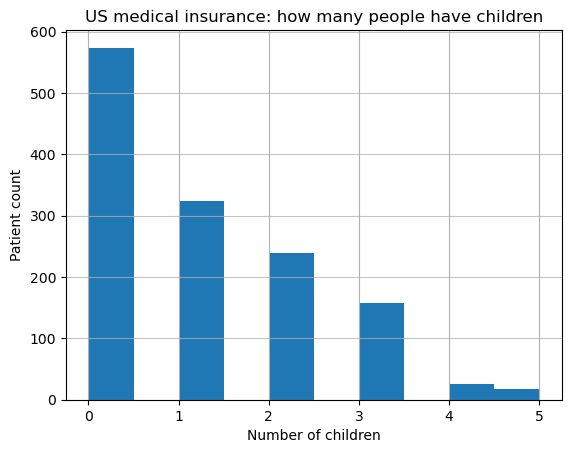

In [915]:
#interesting that non smoking males pay slightly less, and smoking males pay more. is this due to age distribution or children?
def children(df):
    
    children = df['children'].hist()
    
    children.plot(grid=True, bins=300, rwidth=2, color='#607c8e')
    plt.title('US medical insurance: how many people have children')
    plt.xlabel('Number of children')
    plt.ylabel('Patient count')
    plt.grid(axis='y', alpha=0.75)
    
children(orig_df)

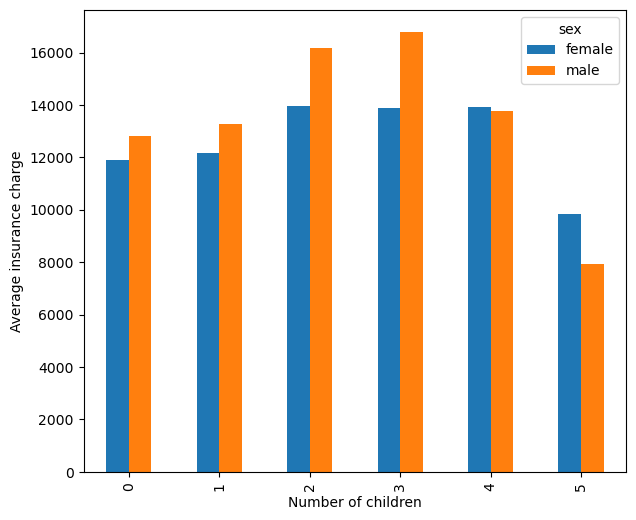

In [914]:
def avg_cost_children(df):
    
    #group by number of children and mean the charges
    
    df_pivot = pd.pivot_table(df, values="charges", index="children", columns="sex", aggfunc=np.mean)
    ax = df_pivot.plot(kind="bar")
    # Get a Matplotlib figure from the axes object for formatting purposes
    fig = ax.get_figure()
    fig.set_size_inches(7, 6)
    ax.set_xlabel("Number of children")
    ax.set_ylabel("Average insurance charge")

avg_cost_children(orig_df)